# Lecture examples - Simulations #

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Random distributions

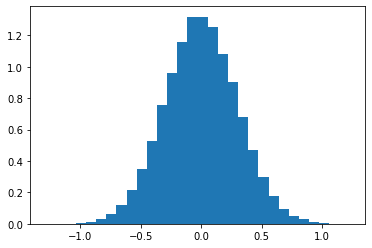

In [28]:
# normal( mean, standard deviation, number of samples)
normal = np.random.normal(0, .3, 100000)
plt.hist(normal, 30, density=True)
plt.show()

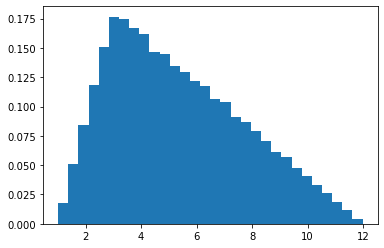

In [24]:
# triangular( min, peak, max, number of samples)
triang = np.random.triangular(1, 3, 12, 100000)
plt.hist(triang, 30, density=True)
plt.show()

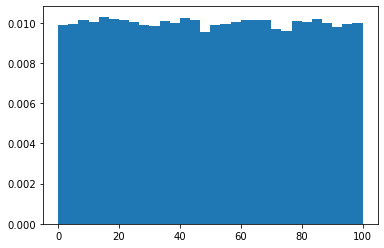

In [26]:
# uniform( min, max, number of samples)
uniform = np.random.uniform(0, 100, 100000)
plt.hist(uniform, 30, density=True)
plt.show()

## Simulation examples

In [17]:
def probabilityOfDoubles(iterations):
    numRolls = 0
    numDoubles = 0
    for i in range(iterations):
        die1 = int(np.random.rand() * 6 + 1)
        die2 = int(np.random.rand() * 6 + 1)
        numRolls = numRolls + 1

        if die1 == die2:
            numDoubles = numDoubles + 1
    
    return float(numDoubles) / float(numRolls)

In [19]:
probabilityOfDoubles(10000)

0.1684

In [23]:
def simulateHalfLife(numAtoms, decayProb, timeSteps):
    initialAtoms = numAtoms
    for t in range(timeSteps):
        for m in range(numAtoms):
            if np.random.rand() < decayProb:
                numAtoms -= 1
    return initialAtoms, numAtoms

In [35]:
simulateHalfLife(78, 0.4, 10)

(78, 2)

In [29]:
def plotDecay(numAtoms, decayProb, timeSteps):
    numRemaining = [numAtoms]
    for t in range(timeSteps):
        count = numAtoms*((1-decayProb)**t)
        numRemaining.append(count)
    plt.plot(numRemaining)
    plt.xlabel("Time Steps")
    plt.ylabel("Atoms")
    plt.grid(True)
    plt.show()

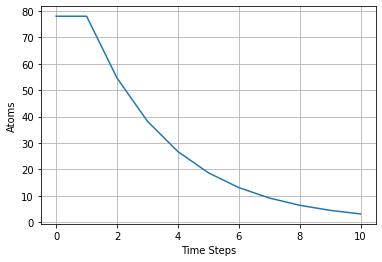

In [36]:
plotDecay(78,0.3,10)

In [38]:
import math

# math.pi, epsilon 0.0001 
def estimatePi(iterations):
    numInsideCircle = 0
    for i in range(iterations):
        if dropObject():
            numInsideCircle += 1
    return 4.0 * float(numInsideCircle) / float(iterations)

def dropObject():
    x = np.random.random()
    y = np.random.random()
    if math.sqrt(x**2 + y**2) < 1.0:
        return True
    else:
        return False

In [49]:
print(estimatePi(10))
print(estimatePi(1000))
print(estimatePi(100000))

2.4
3.136
3.14796


## Estimate earnings 

Task: Write a function `simulateEarnings(distUnitP, distUnitS, distFixedC, distVariableC, n)`, where `n` is the number of scenarios to be explored.

1. Generate triangular distributions (each of the parameters is distribution) for:
- `unitPrice`
- `unitSales`
- `fixedCosts`
- `variableCosts`

2. Calculate the earnings by taking random numbers from these distributions and plugging them into the formula:

```
earningsestimated = unitPrice * unitSales − varCosts − fixedCosts
```

3. Plot the distribution of earnings, to give us a good idea of what to expect


In [1]:
import numpy as np  
import matplotlib.pyplot as plt   

Distribution : 
 [8.6765469  4.45486543 1.34205655 ... 3.33143052 6.16229982 3.76345758]


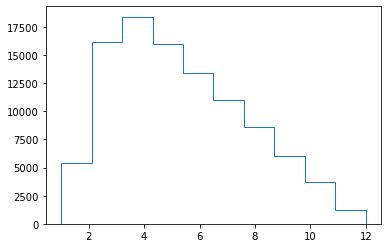

In [2]:
# step 1: generate a triangular distributions
#       np.random.triangular(minValue, peakValue, maxValue, distSize)
distribution = np.random.triangular(1, 3, 12, 100000)
print("Distribution : \n", distribution) 
     
plot = plt.hist(distribution, histtype='step') 
plt.show()

# next generate distributions for each:

# unitPrice
# unitSales
# fixedCosts
# variableCosts

In [3]:
'''
The exercise doesn't set the limits (max, min, peak) for the distributions. So we can choose it ourselves.
I'm also defining how many scenarios we will be simulating `iterations`
'''
iterations = 100000
# unitPrice
distUnitPrice = np.random.triangular(20, 25, 35, iterations)
# plt.hist(distUnitPrice, histtype='step') 
# unitSales
distUnitSales = np.random.triangular(0, 10, 200, iterations)
# plt.hist(distUnitSales, histtype='step') 
# fixedCosts
distFixedCosts = np.random.triangular(1, 5, 7, iterations)
# plt.hist(distFixedCosts, histtype='step') 
# variableCosts
distVariableCosts = np.random.triangular(0, 3, 11, iterations)
# plt.hist(distVariableCosts, histtype='step') 

# next step calculate earnings in the simulation

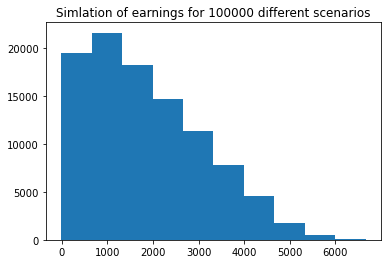

In [7]:
def simulateEarnings(distUnitP, distUnitS, distFixedC, distVariableC, n):
#     store each result per scenario
    resultingSimulationEarnings = []
#     generating n scenarios
    for scenario in range(n):
#         determining this scenario's values
        unitPrice = distUnitP[scenario]
        unitSales = distUnitS[scenario] 
        fixedCosts = distFixedC[scenario] 
        varCosts = distVariableC[scenario]        
#         calculating earnings estimation based on formula
        earningsestimated = unitPrice * unitSales - varCosts - fixedCosts
#         saving this scenario's result
        resultingSimulationEarnings.append(earningsestimated)
#     Next step: plot the results from all simulations
    plt.hist(resultingSimulationEarnings) 
    plt.title("Simlation of earnings for "+str(n)+" different scenarios")
    
simulateEarnings(distUnitPrice, distUnitSales, distFixedCosts, distVariableCosts, iterations)